In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from phase_space_reconstruction.virtual.beamlines import quadlet_tdc_bend
from phase_space_reconstruction.virtual.scans import run_3d_scan
from phase_space_reconstruction.diagnostics import ImageDiagnostic
from phase_space_reconstruction.visualization import plot_3d_scan_data
from phase_space_reconstruction.train import train_3d_scan

from bmadx.distgen_utils import create_beam
from bmadx.plot import plot_projections
from bmadx.constants import PI

In [2]:
# lattice and data directory
p0c = 43.4e6 # reference momentum in eV/c
lattice = quadlet_tdc_bend(p0c=p0c, dipole_on=False)
data_dir = os.path.join('data', 'yaml_files')

In [3]:
# create gaussian and nongaussian beams using Bmad-X distgen functionality
gaussian_beam = torch.load('gt_beam_3mm_p1mrad.pt')

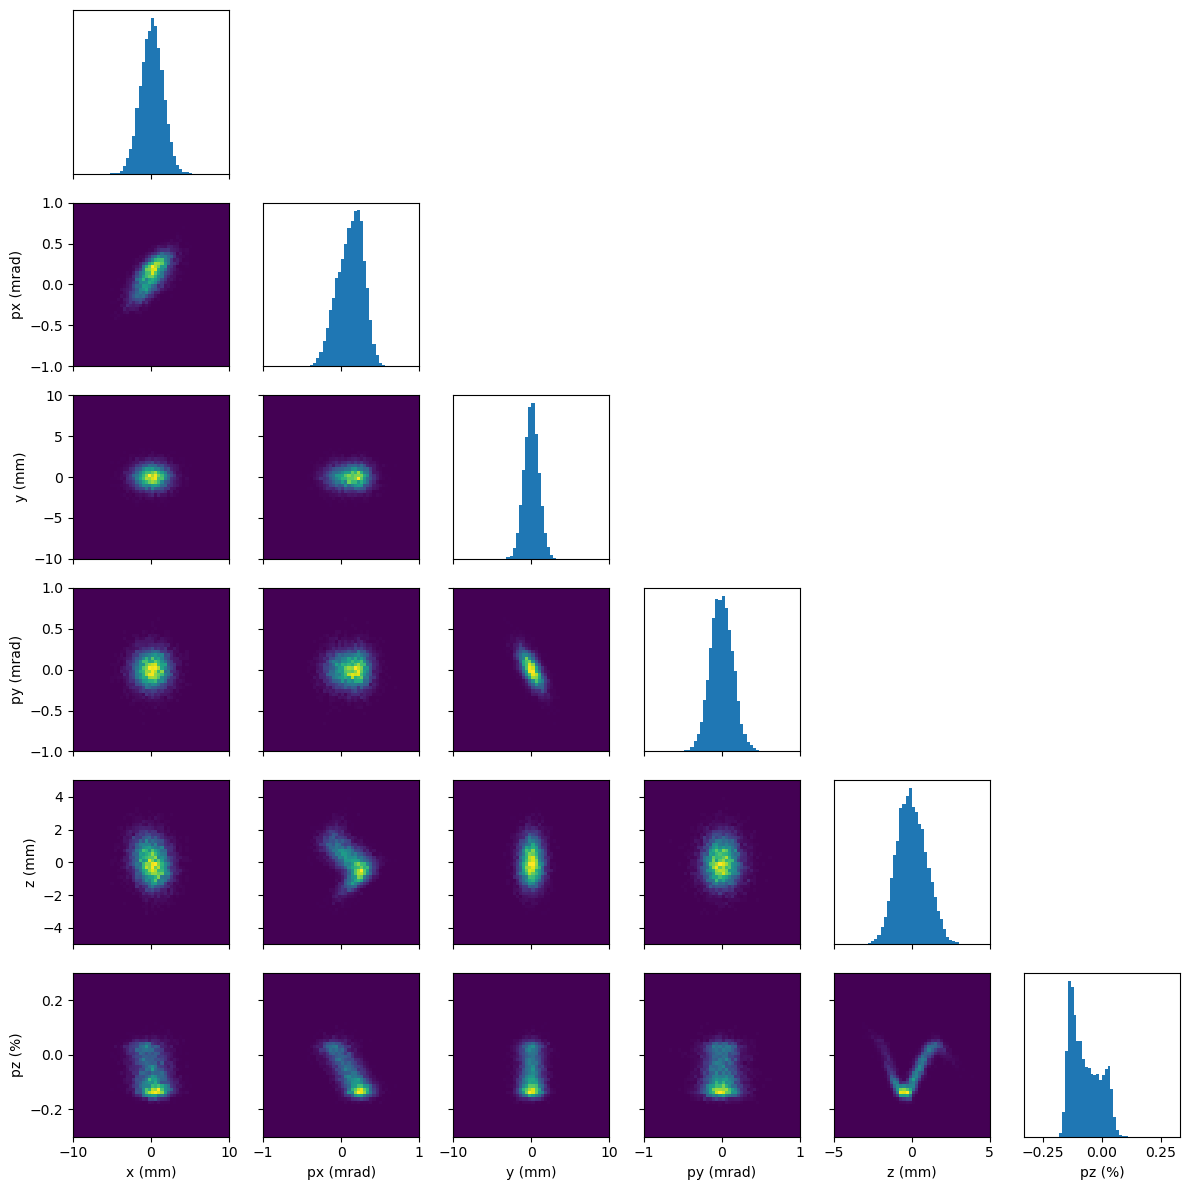

In [4]:
# plot linear and nonlinear beams
lims = np.array([[-10e-3, 10e-3],
                 [-1e-3, 1e-3],
                 [-10e-3, 10e-3],
                 [-1e-3, 1e-3],
                 [-5e-3, 5e-3],
                 [-3e-3, 3e-3]])
fig, ax = plot_projections(gaussian_beam.numpy_particles(), custom_lims=lims)
plt.show()

In [5]:
# use xopt for optimization
from triplet_opt import optimize_function, output
from xopt import VOCS

opt_vocs = VOCS(
        variables = {"k1":[0,20], "k2":[-20,0], "k3":[0,20]},
        objectives = {"total_size": "MINIMIZE"}
    )

opt_gaussian_beam = optimize_function(
    opt_vocs, output, n_iterations=100, 
    function_kwargs={
        'beam': gaussian_beam,
        'lattice': lattice
    }
)


/home/jp/mambaforge/envs/ps-reconstruction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# optimization results for linear beam
opt_gaussian_beam.data

,k1,k2,k3,std_x,std_y,total_size,xopt_runtime,xopt_error
1,9.376973,-2.275519,17.307492,0.001778,0.013447,0.013452,0.715879,False
2,11.818532,-14.351482,4.733953,0.006414,0.001777,0.006533,0.158300,False
3,11.282532,-0.667734,4.100330,0.003984,0.007596,0.008443,0.015191,False
4,13.385591,-11.009211,0.000000,0.009063,0.002010,0.009165,1.481116,False
5,10.198574,-19.157155,6.214581,0.004960,0.004323,0.006439,1.082407,False
...,...,...,...,...,...,...,...,...
99,12.768252,-7.679371,19.302217,0.000978,0.013108,0.013037,0.292242,False
100,16.528643,-11.445242,13.464662,0.004621,0.007456,0.008634,1.434847,False
101,19.872117,-0.267905,9.448630,0.003201,0.018732,0.018889,1.430724,False
102,11.236904,-5.900047,4.747573,0.004572,0.004207,0.006072,1.017214,False


In [7]:
opt_gaussian_beam.data.iloc[-1][["k1","k2", "k3"]]

k1      2.68732
k2   -15.505916
k3    14.406701
Name: 103, dtype: object